## import libraries

In [42]:
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
insurance = pd.read_csv('insurance.csv')

In [44]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## yes convert to one and no convert to zero

In [46]:
insurance=insurance.replace('yes',1)

In [47]:
insurance=insurance.replace('no',0)

C:\Users\USER\AppData\Local\Temp\ipykernel_5740\3299880856.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance=insurance.replace('no',0)


In [48]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


## object convert to bool 

In [49]:
sex = pd.get_dummies(insurance['sex'],drop_first=True)
region = pd.get_dummies(insurance['region'],drop_first=True)

In [50]:
insurance = pd.concat([insurance,sex,region],axis=1)

In [51]:
insurance

,age,sex,bmi,children,smoker,region,charges,male,northwest,southeast,southwest
0,19,female,27.900,0,1,southwest,16884.92400,False,False,False,True
1,18,male,33.770,1,0,southeast,1725.55230,True,False,True,False
2,28,male,33.000,3,0,southeast,4449.46200,True,False,True,False
3,33,male,22.705,0,0,northwest,21984.47061,True,True,False,False
4,32,male,28.880,0,0,northwest,3866.85520,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,True,True,False,False
1334,18,female,31.920,0,0,northeast,2205.98080,False,False,False,False
1335,18,female,36.850,0,0,southeast,1629.83350,False,False,True,False
1336,21,female,25.800,0,0,southwest,2007.94500,False,False,False,True


## drop unnecessory columns

In [52]:
insurance.drop(['sex','region'],axis=1,inplace=True)

In [53]:
insurance

,age,bmi,children,smoker,charges,male,northwest,southeast,southwest
0,19,27.900,0,1,16884.92400,False,False,False,True
1,18,33.770,1,0,1725.55230,True,False,True,False
2,28,33.000,3,0,4449.46200,True,False,True,False
3,33,22.705,0,0,21984.47061,True,True,False,False
4,32,28.880,0,0,3866.85520,True,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,True,True,False,False
1334,18,31.920,0,0,2205.98080,False,False,False,False
1335,18,36.850,0,0,1629.83350,False,False,True,False
1336,21,25.800,0,0,2007.94500,False,False,False,True


In [54]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   smoker     1338 non-null   int64  
 4   charges    1338 non-null   float64
 5   male       1338 non-null   bool   
 6   northwest  1338 non-null   bool   
 7   southeast  1338 non-null   bool   
 8   southwest  1338 non-null   bool   
dtypes: bool(4), float64(2), int64(3)
memory usage: 57.6 KB


## bool convert to int 

In [57]:
insurance['male'] = insurance['male'].astype(int)

In [59]:
insurance['northwest'] = insurance['northwest'].astype(int)

In [60]:
insurance['southeast'] = insurance['southeast'].astype(int)

In [61]:
insurance['southwest'] = insurance['southwest'].astype(int)

In [62]:
insurance

,age,bmi,children,smoker,charges,male,northwest,southeast,southwest
0,19,27.900,0,1,16884.92400,0,0,0,1
1,18,33.770,1,0,1725.55230,1,0,1,0
2,28,33.000,3,0,4449.46200,1,0,1,0
3,33,22.705,0,0,21984.47061,1,1,0,0
4,32,28.880,0,0,3866.85520,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,1,1,0,0
1334,18,31.920,0,0,2205.98080,0,0,0,0
1335,18,36.850,0,0,1629.83350,0,0,1,0
1336,21,25.800,0,0,2007.94500,0,0,0,1


In [63]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   smoker     1338 non-null   int64  
 4   charges    1338 non-null   float64
 5   male       1338 non-null   int64  
 6   northwest  1338 non-null   int64  
 7   southeast  1338 non-null   int64  
 8   southwest  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


<Figure size 640x480 with 0 Axes>

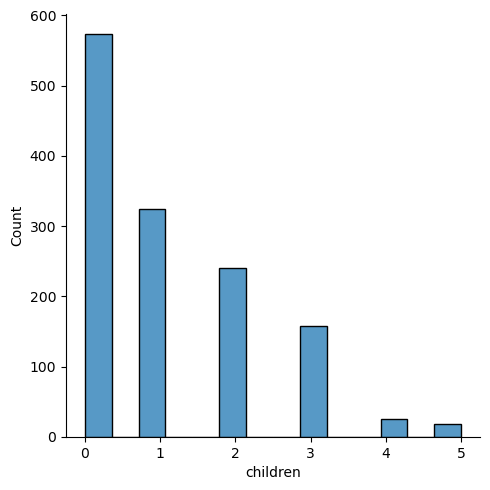

<Figure size 640x480 with 0 Axes>

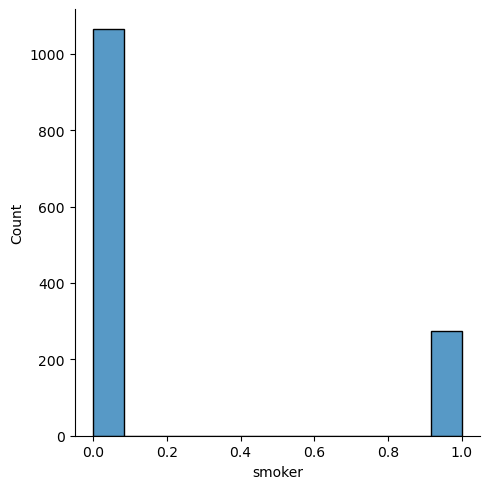

<Figure size 640x480 with 0 Axes>

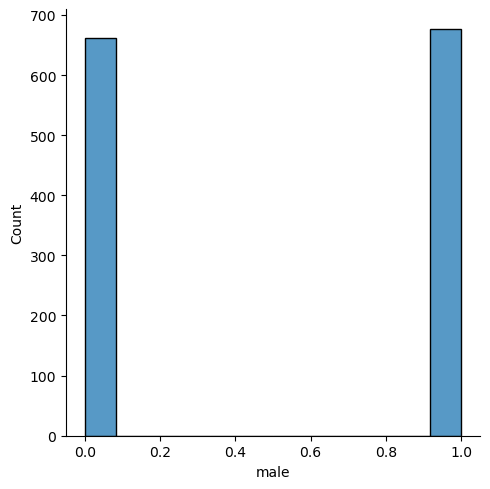

<Figure size 640x480 with 0 Axes>

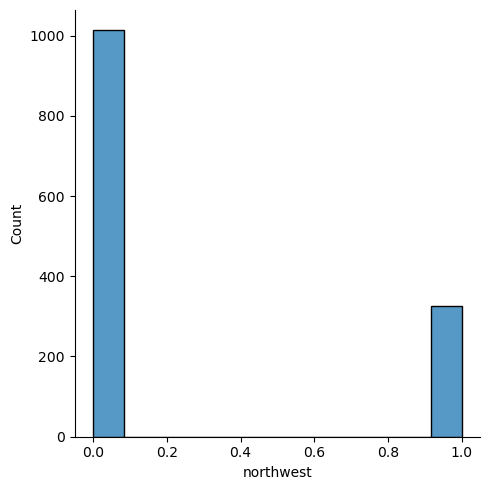

<Figure size 640x480 with 0 Axes>

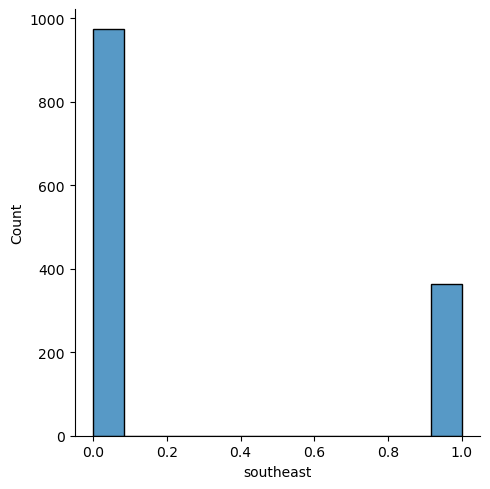

<Figure size 640x480 with 0 Axes>

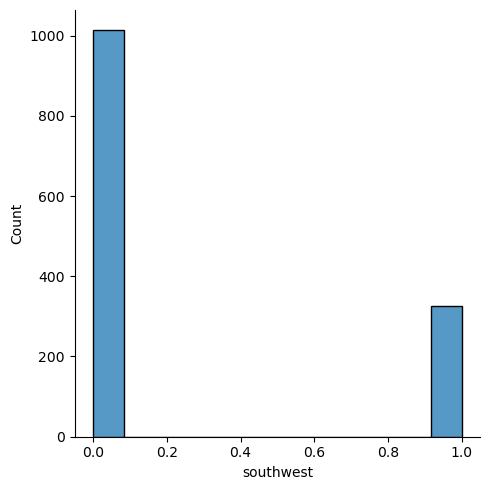

In [67]:
a=['children', 'smoker', 'male', 'northwest', 'southeast', 'southwest']
for i in a:
    plt.figure()
    sns.displot(insurance[i])
    plt.show()

In [76]:
x = insurance.drop(columns=['charges'])
y = insurance['charges'] 
y= pd.DataFrame(y)

In [77]:
x

,age,bmi,children,smoker,male,northwest,southeast,southwest
0,19,27.900,0,1,0,0,0,1
1,18,33.770,1,0,1,0,1,0
2,28,33.000,3,0,1,0,1,0
3,33,22.705,0,0,1,1,0,0
4,32,28.880,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [78]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [79]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns) 
y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.30, random_state=1)

In [81]:
x_train

,age,bmi,children,smoker,male,northwest,southeast,southwest
744,0.768473,-0.697746,-0.908614,-0.507463,0.989591,1.765481,-0.611324,-0.566418
363,-1.296362,-0.699387,-0.078767,-0.507463,-1.010519,-0.566418,-0.611324,1.765481
10,-1.011557,-0.728915,-0.908614,-0.507463,0.989591,-0.566418,-0.611324,-0.566418
970,0.768473,-0.410668,1.580926,-0.507463,-1.010519,-0.566418,1.635795,-0.566418
634,0.839674,1.482405,-0.078767,-0.507463,0.989591,-0.566418,-0.611324,1.765481
...,...,...,...,...,...,...,...,...
715,1.480485,-0.289276,-0.908614,-0.507463,0.989591,-0.566418,-0.611324,1.765481
905,-0.940356,-0.214635,0.751079,-0.507463,-1.010519,-0.566418,-0.611324,-0.566418
1096,0.839674,0.704834,0.751079,1.970587,-1.010519,-0.566418,-0.611324,-0.566418
235,0.056461,-1.385093,0.751079,1.970587,-1.010519,-0.566418,1.635795,-0.566418


In [82]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [83]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for age is 0.29199974833698983
The coefficient for bmi is 0.16234411292901316
The coefficient for children is 0.03433951439975521
The coefficient for smoker is 0.8020333171191404
The coefficient for male is -0.011679865208254587
The coefficient for northwest is -0.010772347998890042
The coefficient for southeast is -0.03453151635628349
The coefficient for southwest is -0.030755454895305515


In [84]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.00537604552664238


In [86]:
ridge = Ridge(alpha=.5)
ridge.fit(x_train,y_train)

Ridge(alpha=0.5)

In [87]:
for i,col in enumerate(x_train.columns):   
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[i]))

Ridge model coefficients for age is 0.29184958760847224:
Ridge model coefficients for bmi is 0.16225986210895055:
Ridge model coefficients for children is 0.03432102243824562:
Ridge model coefficients for smoker is 0.801602809085216:
Ridge model coefficients for male is -0.011640200215546046:
Ridge model coefficients for northwest is -0.01074484105577889:
Ridge model coefficients for southeast is -0.034449994582437145:
Ridge model coefficients for southwest is -0.030708375466909715:


In [89]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [90]:
for i,col in enumerate(x_train):
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

Lasso model coefficients for age is 0.2836129716283765:
Lasso model coefficients for bmi is 0.1474856786189686:
Lasso model coefficients for children is 0.02431142157233921:
Lasso model coefficients for smoker is 0.7911752936840185:
Lasso model coefficients for male is -0.0:
Lasso model coefficients for northwest is 0.0:
Lasso model coefficients for southeast is -0.009076954201477134:
Lasso model coefficients for southwest is -0.008549982122768533:


In [91]:
print(regression_model.score(x_train, y_train))
print(regression_model.score(x_test, y_test))

0.7545557492633161
0.7405989316927212


In [92]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.7545555342290938
0.7406050506458937


In [93]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.753581246438486
0.7380658506980582


In [94]:
from sklearn.preprocessing import PolynomialFeatures

In [95]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [96]:
x_poly = poly.fit_transform(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.30, random_state=1)
x_train.shape

(936, 37)

In [97]:
regression_model.fit(x_train, y_train)
print(regression_model.coef_[0])

[-1.31186329e-14  3.62419357e+03  1.94119725e+03  4.57937226e+02
  9.65005204e+03 -3.41238309e+02 -4.25838455e+01 -1.59766798e+02
 -2.62574542e+02  1.49586869e+02  7.48401235e+01 -2.86473395e+01
  1.64468219e+02  3.49674704e+01  3.96067891e+02  3.44410736e+02
 -9.28517133e+01  3.57069102e+03 -1.78865029e+00 -8.05433468e+01
 -5.75016634e+02 -2.61505999e+02 -3.84162284e+02 -6.96315665e+01
  2.55309196e+02 -3.39320786e+01 -4.29258705e+01 -1.23814364e+02
 -6.61940554e+01 -9.58763837e+01  1.20392578e+02 -4.35603046e+01
  1.31219579e+02  2.88546968e+00  1.16527284e+02  1.72847168e+02
  2.51012805e+02]


In [98]:
ridge = Ridge(alpha=.3)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.00000000e+00  3.62296543e+03  1.94058082e+03  4.57783618e+02
  9.64683967e+03 -3.40841211e+02 -4.25862672e+01 -1.59561334e+02
 -2.62447955e+02  1.49472787e+02  7.45760899e+01 -2.86789237e+01
  1.64437811e+02  3.47897591e+01  3.95855840e+02  3.44058126e+02
 -9.26650781e+01  3.56931391e+03 -1.60786638e+00 -8.04299605e+01
 -5.74538748e+02 -2.61017729e+02 -3.84044591e+02 -6.95210904e+01
  2.55239132e+02 -3.41117980e+01 -4.30234316e+01 -1.23155167e+02
 -6.62407776e+01 -9.53296050e+01  1.20513594e+02 -4.37055661e+01
  1.31015773e+02  2.84235784e+00  1.16412387e+02  1.72776839e+02
  2.50819041e+02]


In [99]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.8436746437607503
0.8414458613649639


In [100]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00  3.62417967e+03  1.94118441e+03  4.57925191e+02
  9.65004183e+03 -3.41227520e+02  1.00041062e+02 -1.97316556e+02
 -2.20628003e+02  1.49579110e+02  7.48249077e+01 -2.86344040e+01
  1.64454285e+02  3.49295866e+01  3.96034064e+02  3.44375772e+02
 -9.28393203e+01  3.57067158e+03 -1.77358111e+00 -8.05021870e+01
 -5.74977418e+02 -2.61461050e+02 -3.84152641e+02 -6.96235772e+01
  2.55308841e+02 -3.39154913e+01 -4.29126396e+01 -1.23798607e+02
 -6.61772809e+01 -9.58546472e+01  1.20394540e+02 -4.35627490e+01
  1.31195169e+02  2.86752407e+00  1.65690154e+02  3.71518638e+02
  1.35492790e+02]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.996e+07, tolerance: 1.391e+07
  model = cd_fast.enet_coordinate_descent(


In [101]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.8436747359676446
0.8414519816055818
